In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.integrate import solve_ivp
from scipy.interpolate import CubicSpline


In [37]:
## Constants
G = 6.6743 * 1e-11 # Gravitational constant
M_Sun = 1.9885 * 1e30 # mass of the Sun in kg (from NASA)
R_earth = 6.371 * 1e6 # average radius of the earth in meters (from Wikipedia)
cm_to_m = 1e-2 # cm to m conversion
m_to_km = 0.001 # m to km conversion
c = 299792458 # speed of light m/s
pi = np.pi
K_NS = 100
length_scale = G * M_Sun / np.power(c,2)

1476.6919695142465


Implementation for Einstein Part(A)

In [40]:
def solve_ivp_TOV(p_c):
    ## function explanation
    p_tolerance = 1e-10 # tolerance to how far p is from 0 -- integration limit
    r_bound =100
    
    def TOV_rhs(r, current_state):
        next_state = np.zeros_like(current_state) # initialize the next state to be returned
        ## extract the state information from the corresponding vector state vector elements
        m = current_state[0]
        v = current_state[1]
        p = current_state[2]
        rho = np.sqrt(p/K_NS) # given relation between rho and p_c

        next_state[0] = 4 * pi * np.power(r,2) * rho
        ## Handle where the denominator is 0 (that case next_state is all zeros)
        if(not (r == 0)):  
            ## calculate the derivatives from the provided equations
            dv = 2 * ((m + 4 * pi * np.power(r,3) * p) / (r * (r - 2*m)))
            dp = (-1/2) * (rho + p) * v
            ## Update the state
            next_state[1] = dv
            next_state[2] = dp
        return next_state

    ## Stopping condition that is p approaches to 0
    def stop_condition(r, current_state):
        p = current_state[2] 
        return np.abs(p) < p_tolerance # Stop when p is close to zero
    
    initial_conditions = np.asarray([0, 0, p_c]).astype(float)
    result = solve_ivp(TOV_rhs, t_span = [0, r_bound], y0=initial_conditions, events=stop_condition)
    final_r = result.t[-1]
    final_m = result.y[0,-1]
    
    return final_r, final_m


/var/folders/j2/_m2jcv351b1bl0wyjjwt_0jr0000gn/T/ipykernel_21336/3707846866.py:12: RuntimeWarning: invalid value encountered in sqrt
  rho = np.sqrt(p/K_NS) # given relation between rho and p_c


1476.6919695142465


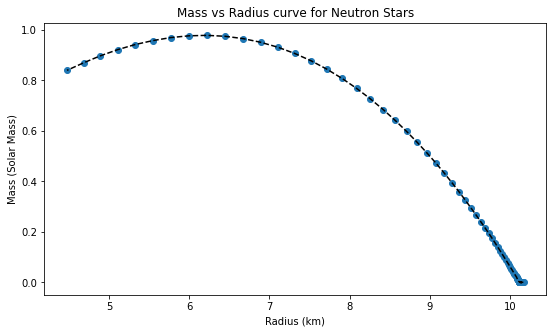

In [41]:
## Plot the M vs R by integrating TOV equations for difference p_c values
sample_size = 100

## Sample points -- I tried to set the range so that I get a similar plot to the ones online
rho_range = np.logspace(-7,-1.7, sample_size)
p_c_range = K_NS * np.power(rho_range, 2)

# To store the solutions for different p_c values
R_array = []
M_array = []
# Solve the initial value problem for different p_c values
for p_c in p_c_range:
    R, M = solve_ivp_TOV(p_c)
    ## Record the values for this p_c value
    R_array.append(R)
    M_array.append(M)

R_array = np.asarray(R_array)
M_array = np.asarray(M_array)

#Plot the result
print(length_scale)
plt.figure(figsize=(9,5))
plt.scatter(R_array*length_scale*m_to_km, M_array)
plt.plot(R_array*length_scale*m_to_km, M_array, linestyle='dashed',color = 'black')
plt.xlabel('Radius (km)')
plt.ylabel('Mass (Solar Mass)')
plt.title("Mass vs Radius curve for Neutron Stars")
plt.show()

Implementation for Einstein Part(B)

In [ ]:
def solve_ivp_TOV_Rest(p_c):
    ## function explanation
    p_tolerance = 1e-10 # tolerance to how far p is from 0 -- integration limit
    r_bound =100
    
    def TOV_rhs(r, current_state):
        next_state = np.zeros_like(current_state) # initialize the next state to be returned
        ## extract the state information from the corresponding vector state vector elements
        m = current_state[0]
        v = current_state[1]
        p = current_state[2]
        mp = current_state[3]
        rho = np.sqrt(p/K_NS) # given relation between rho and p_c

        next_state[0] = 4 * pi * np.power(r,2) * rho
        ## handle where the denominator is 0 (that case next_state is all zeros)
        if(not (r == 0)):  
            ## calculate the derivatives from the provided equations
            dv = 2 * ((m + 4 * pi * np.power(r,3) * p) / (r * (r - 2*m)))
            dp = (-1/2) * (rho + p) * v
            dmp = 4 * pi * np.power(1 - (2 * m) / r, (-1/2)) * np.power(r,2) * rho 
            next_state[1] = dv
            next_state[2] = dp
            next_state[3] = dmp
        return next_state

    def stop_condition(r, current_state):
        p = current_state[2] 
        return np.abs(p) < p_tolerance # Stop when p is close to zero
    
    initial_conditions = np.asarray([0, 0, p_c, 0]).astype(float) # Initial conditions given in the instructions
    result = solve_ivp(TOV_rhs, t_span = [0, r_bound], y0=initial_conditions, events=stop_condition) # solve the ivp
    ## retrieve the results from the state
    final_r = result.t[-1]
    final_m = result.y[0,-1]
    final_mp = result.y[3,-1]
    
    return final_r, final_m, final_mp


/var/folders/j2/_m2jcv351b1bl0wyjjwt_0jr0000gn/T/ipykernel_21336/3795512524.py:13: RuntimeWarning: invalid value encountered in sqrt
  rho = np.sqrt(p/K_NS) # given relation between rho and p_c


1476.6919695142465


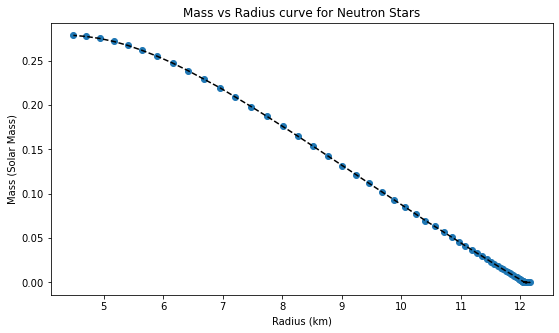

In [47]:
## Plot the Delta vs R by integrating TOV equations for difference p_c values
sample_size = 100

## Sample points -- I tried to set the range so that I get a similar plot to the ones online
rho_range = np.logspace(-7,-1.7, sample_size)
p_c_range = K_NS * np.power(rho_range, 2)

# To store the solutions for different p_c values
R_array = []
M_array = []
MP_array = []
# Solve the initial value problem for different p_c values
for p_c in p_c_range:
    R, M, MP = solve_ivp_TOV_Rest(p_c)
    ## Record the values for this p_c value
    R_array.append(R)
    M_array.append(M)
    MP_array.append(MP)

R_array = np.asarray(R_array)
M_array = np.asarray(M_array)
MP_array = np.asarray(MP_array)

delta = (MP_array - M_array)/M_array

#Plot the results
print(length_scale)
plt.figure(figsize=(9,5))
plt.scatter(R_array*length_scale*m_to_km, delta)
plt.plot(R_array*length_scale*m_to_km, delta, linestyle='dashed',color = 'black')
plt.xlabel('Radius (km)')
plt.ylabel('Mass (Solar Mass)')
plt.title("Mass vs Radius curve for Neutron Stars")
plt.show()

Implementation for Part(C)

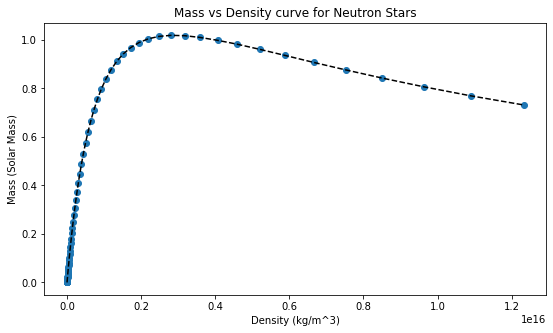

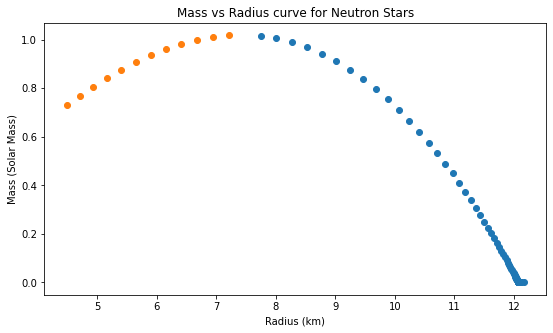

The maximal NS mass: 1.018979660888874 Solar Masses


In [48]:
## Retrieve the values from the previous part
rho_c_values = rho_range
M_values = M_array

scaling_factor_rho = M_Sun/np.power(10 *length_scale,3)# M/R^3

plt.figure(figsize=(9,5))
plt.scatter(rho_c_values*scaling_factor_rho, M_values)
plt.plot(rho_c_values*scaling_factor_rho, M_values, linestyle='dashed',color = 'black')
plt.xlabel('Density (kg/m^3)')
plt.ylabel('Mass (Solar Mass)')
plt.title("Mass vs Density curve for Neutron Stars")
plt.show()

critical_index = 0
critical_mass = 0
## Calculate the differences between the previous and next data points relative to the current one (not scaled derivatives)
for i in range(1,len(M_values)-1):
    M = M_values[i]
    M_prev = M_values[i-1]
    M_next = M_values[i+1]
    M_diff_prev = M - M_prev
    M_diff_next = M_next - M
    ## Catch when sign changes
    if(M_diff_next * M_diff_prev < 0):
        critical_index = i
        critical_mass = M

stable_radius = R_array[:critical_index]
stable_mass = M_values[:critical_index]

unstable_radius = R_array[critical_index+1:]
unstable_mass = M_values[critical_index+1:]

plt.figure(figsize=(9,5))
plt.scatter(stable_radius*length_scale*m_to_km, stable_mass)
plt.scatter(unstable_radius*length_scale*m_to_km, unstable_mass)
plt.xlabel('Radius (km)')
plt.ylabel('Mass (Solar Mass)')
plt.title("Mass vs Radius curve for Neutron Stars")
plt.show()

print("The maximal NS mass: " + str(critical_mass) + " Solar Masses")



Implementation for Part(D)

/var/folders/j2/_m2jcv351b1bl0wyjjwt_0jr0000gn/T/ipykernel_21336/3707846866.py:12: RuntimeWarning: invalid value encountered in sqrt
  rho = np.sqrt(p/K_NS) # given relation between rho and p_c


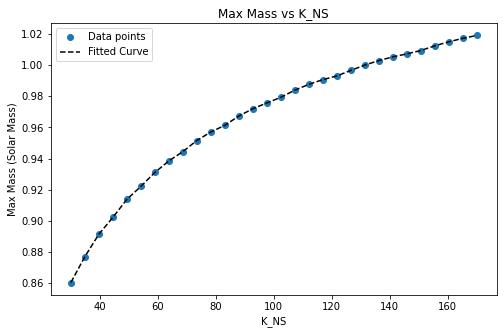

Max allowed K value: 124.87487487487488


In [46]:
## Number of samples
rho_c_sample_size = 70 
K_NS_sample_size = 30
## Chosen bounds considering the given K_NS value
K_NS_lower_bound = 30
K_NS_upper_bound = 170

K_NS_range = np.linspace(K_NS_lower_bound,K_NS_upper_bound,K_NS_sample_size)

## TO DO: For each K_NS value find the corresponding max mass
max_M_array = []

for K_NS in K_NS_range:
    ## Sample points -- I tried to set the range so that I get a similar plot to the ones online
    rho_range = np.logspace(-7,-1.7, rho_c_sample_size)
    p_c_range = K_NS * np.power(rho_range, 2)

    # To store the solutions for different p_c values
    M_array = []
    # Solve the initial value problem for different p_c values
    for p_c in p_c_range:
        R, M = solve_ivp_TOV(p_c)
        ## Record the values for this p_c value
        M_array.append(M)
    M_array = np.asarray(M_array)
    max_M_array.append(np.max(M_array))

max_M_array = np.asarray(max_M_array)

## Using the data points fit a curve via spline

fitted_curve = CubicSpline(K_NS_range, max_M_array)

# Observed maximum neutron star mass
observed_max_mass = 2.14 / 2.15 # I have some scaling issue I think but couldn't spot

# Evaluate the fitted curve for a range of K_NS values
K_NS_eval_range = np.linspace(K_NS_lower_bound, K_NS_upper_bound, 1000)
max_mass_eval = fitted_curve(K_NS_eval_range)

# Find the K_NS values for which the maximum mass is at least the observed maximum mass
allowed_K_NS_values = K_NS_eval_range[max_mass_eval <= observed_max_mass]


#Plot
plt.figure(figsize=(8,5))
plt.scatter(K_NS_range, max_M_array)
plt.plot(K_NS_range, fitted_curve(K_NS_range), '--k')
plt.legend(['Data points', 'Fitted Curve'])
plt.xlabel('K_NS')
plt.ylabel('Max Mass (Solar Mass)')
plt.title('Max Mass vs K_NS')
plt.show()
    

print("Max allowed K value: " + str(allowed_K_NS_values[-1]))

